In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autokeras as ak
import os
import tensorflow as tf
import time

In [3]:
data = np.load('/work/n1000000_0804_all_flat.npz')
cut_index = np.load('/work/NIO_largerthan100_index.npy')

In [4]:
input_state = 2
target = data['theta23']

if input_state == 0:
    data_all = data['ve_dune']
elif input_state == 1:
    data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune']])
elif input_state == 2:
    data_all = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune'], data['ve_t2hk'], data['vu_t2hk'], data['vebar_t2hk'], data['vubar_t2hk']])

x_train = data_all[:10000, cut_index]
y_train = target[:10000]
x_train2 = data_all[10000:900000, cut_index]
y_train2 = target[10000:900000]
x_test = data_all[900000:, cut_index]
y_test = target[900000:]

In [5]:
clf = ak.StructuredDataRegressor(overwrite=True, max_trials=50)
clf.fit(x_train, y_train,
           validation_split = 0.1,
           batch_size=64,
           epochs=20,
           verbose=1,
           shuffle = True
       )

Trial 50 Complete [00h 00m 39s]
val_loss: 0.021187888458371162

Best val_loss So Far: 0.02050507441163063
Total elapsed time: 00h 22m 39s
INFO:tensorflow:Oracle triggered exit

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/20
157/157 [==============================] - 1s 9ms/step - loss: 266.7839 - mean_squared_error: 266.7839
Epoch 2/20
157/157 [==============================] - 1s 9ms/step - loss: 19.3685 - mean_squared_error: 19.3685
Epoch 3/20
157/157 [==============================] - 1s 9ms/step - loss: 2.8565 - mean_squared_error: 2.8

In [6]:
model = clf.export_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 119)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 119)               0         
_________________________________________________________________
normalization (Normalization (None, 119)               239       
_________________________________________________________________
dense (Dense)                (None, 1024)              122880    
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)              

In [7]:
model.fit(x_train2, y_train2,
           validation_split = 0.1,
           batch_size=64,
           epochs=20,
           verbose=1,
           shuffle = True
         )

Epoch 1/20
12516/12516 [==============================] - 115s 9ms/step - loss: 0.8226 - mean_squared_error: 0.8226 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 2/20
12516/12516 [==============================] - 114s 9ms/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 3/20
12516/12516 [==============================] - 114s 9ms/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 4/20
12516/12516 [==============================] - 114s 9ms/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 5/20
12516/12516 [==============================] - 114s 9ms/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 6/20
12516/12516 [==============================] - 114s 9ms/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0355 - val_mean_squared_error:

In [8]:
model.evaluate(x_test, y_test)
pre_test = model.predict(x_test)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.0357 - mean_squared_error: 0.0357


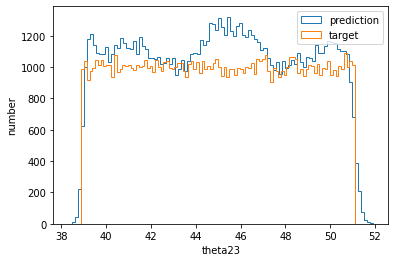

In [9]:
plt.hist(pre_test, histtype = 'step', bins = 100, label = 'prediction')
plt.hist(y_test, histtype = 'step', bins = 100, label = 'target')
plt.xlabel('theta23')
plt.ylabel('number')
plt.legend()
plt.show()

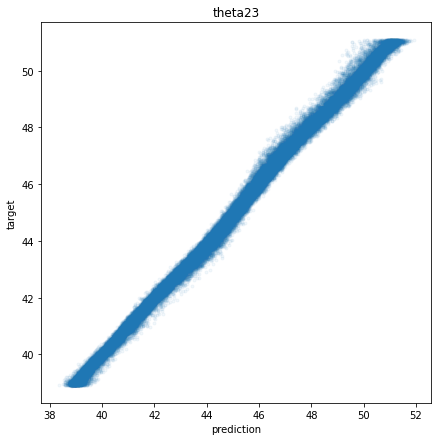

In [10]:
plt.figure(figsize=(7,7))
plt.plot(pre_test[:,0], y_test, '.', alpha = 0.05)
plt.xlabel('prediction')
plt.ylabel('target')
plt.title('theta23')
plt.show()

In [11]:
modelname = '/work/ML4NO/ML/Regression/cuts/0804_cut100_theta23_1.h5'
if not os.path.isfile(modelname):
    model.save(modelname)